In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})


In [4]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [5]:
# Assuming the column name is 'Gender' and contains values like 'Male' / 'Female'

df_male = df[df['Gender'].str.lower() == 'male'].copy()
df_female = df[df['Gender'].str.lower() == 'female'].copy()

In [8]:
df_male = df_male[df_male['WeightCategory'] != 'Obesity_Type_III'].copy()


In [7]:
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

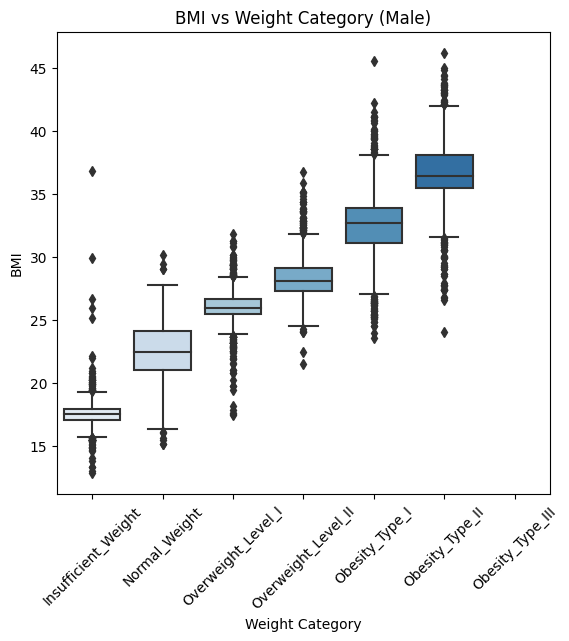

In [9]:
plt.figure(figsize=(14,6))

# Male
plt.subplot(1, 2, 1)
sns.boxplot(
    x='WeightCategory',
    y='BMI',
    data=df_male,
    order=order,
    palette='Blues'
)
plt.title('BMI vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)


In [10]:
outlier_counts = {}

for cat, group in df_male.groupby('WeightCategory'):
    Q1 = group['BMI'].quantile(0.25)
    Q3 = group['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = group[(group['BMI'] < lower) | (group['BMI'] > upper)]
    outlier_counts[cat] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['WeightCategory', 'Outlier_Count'])
print(outlier_df)


        WeightCategory  Outlier_Count
0  Insufficient_Weight             70
1        Normal_Weight             10
2       Obesity_Type_I             77
3      Obesity_Type_II             70
4   Overweight_Level_I            100
5  Overweight_Level_II             58


In [ ]:
# Filter only Overweight_Level_II outliers
overweight_2_outliers = outliers[outliers['WeightCategory'] == 'Overweight_Level_II']

from IPython.display import display

display(overweight_2_outliers)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
453,453,Male,33.185661,1.700627,103.669116,1,yes,2.000000,2.831771,Sometimes,no,1.959531,no,1.194519,0.000000,no,Public_Transportation,Overweight_Level_II,35.845220
915,915,Male,24.079971,1.700164,99.204695,1,yes,2.141280,1.663380,Sometimes,no,2.000000,no,1.930033,0.734210,Sometimes,Public_Transportation,Overweight_Level_II,34.320262
1046,1046,Male,21.000000,1.650000,88.000000,1,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,32.323232
1806,1806,Male,55.022494,1.673394,90.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,0.000000,no,Automobile,Overweight_Level_II,32.140016
1965,1965,Male,17.000000,1.700000,95.000000,1,yes,2.000000,3.000000,Frequently,no,3.000000,no,1.000000,1.000000,no,Public_Transportation,Overweight_Level_II,32.871972
2382,2382,Male,17.486869,1.714508,95.963628,1,yes,2.490507,3.765526,Sometimes,no,1.970622,no,0.973465,2.000000,Sometimes,Public_Transportation,Overweight_Level_II,32.645823
2612,2612,Male,34.243146,1.652971,90.000000,1,yes,2.000000,2.806566,Sometimes,no,1.991251,no,2.000934,0.000000,Sometimes,Automobile,Overweight_Level_II,32.939124
2643,2643,Male,17.000000,1.670000,60.000000,1,yes,2.000000,4.000000,Always,no,2.000000,no,1.000000,2.000000,no,Automobile,Overweight_Level_II,21.513859
2744,2744,Male,27.000000,1.693820,99.204695,1,yes,2.000000,1.672706,Sometimes,no,2.000000,no,0.000000,1.890214,Sometimes,Public_Transportation,Overweight_Level_II,34.577828
2814,2814,Male,29.721964,1.650000,87.105828,1,yes,2.971588,1.000000,Sometimes,no,1.271178,no,2.000000,0.000000,no,Automobile,Overweight_Level_II,31.994794


In [ ]:
# Filter Overweight_Level_II outliers with BMI < 30
overweight_2_outliers = outliers[
    (outliers['WeightCategory'] == 'Overweight_Level_II') &
    (outliers['BMI'] < 30)
]

# Display first 10 rows nicely
from IPython.display import display
display(overweight_2_outliers.head(10))

1000 

950 yes 50 no


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
2643,2643,Male,17.000000,1.670000,60.000000,1,yes,2.000000,4.000000,Always,no,2.000000,no,1.000000,2.000000,no,Automobile,Overweight_Level_II,21.513859
2977,2977,Male,21.538225,1.696412,69.242354,1,no,2.749629,1.874532,Sometimes,no,1.517225,no,1.517890,0.000000,no,Public_Transportation,Overweight_Level_II,24.060750
3197,3197,Male,27.899784,1.799902,78.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,0.000000,1.593704,Frequently,Public_Transportation,Overweight_Level_II,24.076696
6104,6104,Male,33.015258,1.868127,83.952968,1,yes,2.000000,2.879541,Sometimes,no,2.000000,no,1.066241,0.790967,Sometimes,Automobile,Overweight_Level_II,24.055991
8398,8398,Male,26.000000,1.740000,68.000000,0,no,3.000000,3.000000,Sometimes,no,1.000000,no,0.000000,1.000000,Frequently,Automobile,Overweight_Level_II,22.460034
9074,9074,Male,33.000000,1.850000,83.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Frequently,Automobile,Overweight_Level_II,24.251278


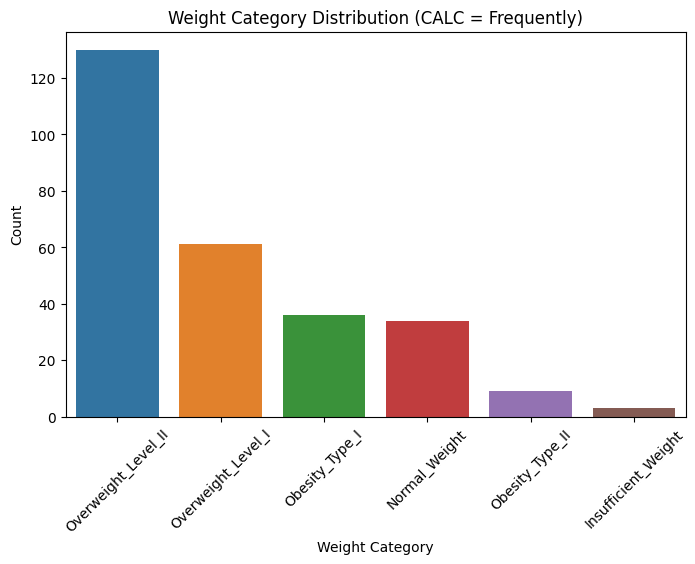

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter df_male for CALC = 'Frequently'
calc_freq = df_male[df_male['CALC'].str.lower() == 'frequently']

# Plot WeightCategory distribution
plt.figure(figsize=(8,5))
sns.countplot(x='WeightCategory', data=calc_freq, order=calc_freq['WeightCategory'].value_counts().index)
plt.title('Weight Category Distribution (CALC = Frequently)')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [14]:
calc_freq 

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
25,25,Male,41.318302,1.853223,96.078462,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,2.000000,0.0,Frequently,Automobile,Obesity_Type_I,27.975038
170,170,Male,27.000000,1.700000,78.000000,1,yes,3.000000,3.000000,Frequently,no,2.000000,no,0.000000,1.0,Frequently,Automobile,Overweight_Level_II,26.989619
228,228,Male,23.000000,1.720000,78.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,0.0,Frequently,Automobile,Overweight_Level_II,26.365603
264,264,Male,28.393111,1.700000,78.055968,1,yes,3.000000,3.000000,Sometimes,no,2.802498,no,1.979355,0.0,Frequently,Automobile,Overweight_Level_II,27.008985
343,343,Male,35.000000,1.750000,85.000000,1,yes,3.000000,3.000000,Frequently,no,3.000000,no,1.000000,0.0,Frequently,Automobile,Overweight_Level_II,27.755102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,15370,Male,26.000000,1.800000,75.000000,1,no,3.000000,3.000000,Always,yes,2.000000,no,3.000000,1.0,Frequently,Public_Transportation,Overweight_Level_I,23.148148
15404,15404,Male,41.000000,1.750000,118.000000,1,yes,2.000000,3.000000,Sometimes,yes,2.000000,no,1.000000,0.0,Frequently,Automobile,Obesity_Type_II,38.530612
15444,15444,Male,18.000000,1.850000,86.000000,1,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.0,Frequently,Public_Transportation,Overweight_Level_II,25.127831
15520,15520,Male,18.000000,1.760000,95.000000,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,2.0,Frequently,Public_Transportation,Obesity_Type_I,30.668905


In [16]:
# Filter for CALC = 'Frequently' and WeightCategory = 'Insufficient_Weight'
calc_freq_insuff = df_male[
    (df_male['CALC'].str.lower() == 'frequently') &
    (df_male['WeightCategory'] == 'Obesity_Type_I')
]

# Show first 10 rows
from IPython.display import display
display(calc_freq_insuff.head(10))


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
25,25,Male,41.318302,1.853223,96.078462,1,yes,2.000000,3.000000,Sometimes,no,3.000000,no,2.00000,0.000000,Frequently,Automobile,Obesity_Type_I,27.975038
584,584,Male,43.000000,1.770000,75.000000,1,yes,2.000000,3.000000,Frequently,no,1.000000,no,1.00000,0.000000,Frequently,Automobile,Obesity_Type_I,23.939481
741,741,Male,18.000000,1.750000,93.000000,1,yes,3.000000,1.000000,Sometimes,no,1.000000,no,0.00000,2.000000,Frequently,Public_Transportation,Obesity_Type_I,30.367347
1582,1582,Male,18.000000,1.780000,108.000000,1,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.00000,1.000000,Frequently,Automobile,Obesity_Type_I,34.086605
2011,2011,Male,25.472995,1.836669,95.952027,1,yes,1.412566,3.000000,Sometimes,no,3.000000,no,2.21939,1.287117,Frequently,Automobile,Obesity_Type_I,28.444111
2285,2285,Male,23.000000,1.900000,95.000000,1,yes,2.000000,3.000000,Always,no,3.000000,no,3.00000,1.000000,Frequently,Walking,Obesity_Type_I,26.315789
2333,2333,Male,23.000000,1.780000,105.000000,1,yes,2.000000,3.000000,Frequently,no,3.000000,no,3.00000,2.000000,Frequently,Public_Transportation,Obesity_Type_I,33.139755
2534,2534,Male,18.000000,1.750000,115.000000,1,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.00000,1.000000,Frequently,Public_Transportation,Obesity_Type_I,37.551020
2823,2823,Male,39.759575,1.783914,96.920350,1,yes,2.000000,2.986172,Sometimes,no,2.364498,no,2.00000,1.978043,Frequently,Automobile,Obesity_Type_I,30.455599
3213,3213,Male,30.000000,1.690000,90.000000,1,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.00000,0.000000,Frequently,Public_Transportation,Obesity_Type_I,31.511502
